# Hypothesis Testing: Associations

## Two-Sample T-Test

Suppose that a company is considering a new color-scheme for their website. They think that visitors will spend more time on the site if it is brightly colored. To test this theory, the company shows the old and new versions of the website to 50 site visitors, each — and finds that, on average, visitors spent 2 minutes longer on the new version compared to the old. Will this be true of future visitors as well? Or could this have happened by random chance among the 100 people in this sample?

One way of testing this is with a *2-sample t-test*. The null hypothesis for this test is that average length of a visit does not differ based on the color of the website. In other words, if we could observe all site visitors in two alternate universes (one where they see each version of the site), the average visiting times in these universes would be equal.

We can use SciPy's `ttest_ind()` function to perform a 2-sample t-test. It takes the values for each group as inputs and returns the t-statistic (not covered in this course) and a p-value:

```
from scipy.stats import ttest_ind
tstat, pval = ttest_ind(times_version1, times_version2)
```

By default, `ttest_ind()` runs a two-sided test.

***
### Exercise

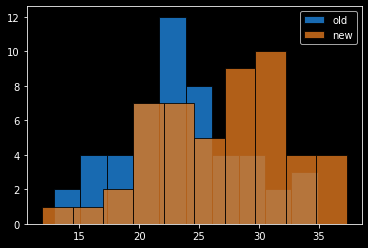

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

#setup environment
plt.style.use('dark_background')
data = pd.read_csv('version_time.csv')

#separate out times for  two versions
old = data.time_minutes[data.version=='old']
new = data.time_minutes[data.version=='new']

#run the t-test here:


#determine significance
significant = None

#plot overlapping histograms
plt.hist(old, alpha=.8, label='old', edgecolor='black', color='#1F85DE')
plt.hist(new, alpha=.8, label='new', edgecolor='black', color='#DE781F')
plt.legend()
plt.show()

1. The company randomly sampled 100 site visitors. They showed the old version of their website to half of their sample and the new version to the other half. The amount of time (in minutes) that each visitor spent on the website was recorded.

    An overlaid histogram showing the amount of time spent on the website by visitors to the new and old versions has already been created for you in the cell above. Inspect the histograms. Based on this picture, do you think there is a significant association between the version of the website a visitor saw and how long they spent on the site?

There is a fair amount of overlap, but it does seem like visitors to the new website are spending slightly more time on the site (the orange distribution is shifted slightly to the right of the blue distribution).

2. The data from this study has already been saved for you: the time spent by the 50 visitors to the old version is saved as `old`; the time spent by visitors to the new version is saved as `new`. Run a two-sample t-test comparing these groups and save the p-value as `pval`, then print it out.

In [2]:
_, pval = ttest_ind(a=old, b=new)
pval

0.0020408264429903995

3. Using a significance threshold of 0.05, is there a significant difference between the average amount of time visitors are spending on the old and new versions of the website? Set the value of `significant` equal to `True` if there is a significant difference and `False` if not.

In [3]:
significant = True

***

## Multiple Tests

In the previous exercise, we used a two-sample t-test to investigate an association between a quantitative variable (time spent on a website) and a binary categorical variable (an old color scheme or a new color scheme).

In some circumstances, we might instead care about an association between a quantitative variable and a *non-binary* categorical variable (non-binary means more than two categories).

For example, suppose that we own a chain of stores that sell ants, called VeryAnts. There are three different locations: A, B, and C. We want to know whether customers are spending a significantly different amount per order at any of the locations.

There are three different comparisons we could make: A vs. B, B vs. C, and A vs. C. One way to answer our question is to simply run three separate 2-sample t-tests.

***
### Exercise

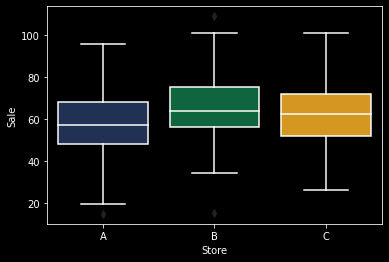

In [4]:
from scipy.stats import ttest_ind
import seaborn as sns

# store the data
veryants = pd.read_csv('veryants.csv')
a = veryants.Sale[veryants.Store == 'A']
b = veryants.Sale[veryants.Store == 'B']
c = veryants.Sale[veryants.Store == 'C']

# create plot
PROPS = {
    'boxprops': {'edgecolor':'white'},
    'medianprops': {'color':'white'},
    'whiskerprops': {'color':'white'},
    'capprops': {'color':'white'}
}

EXOTIC_ORCHIDS_COLOR_SCHEME = {
    'dark_blue': '#192E5B',
    'medium_blue': '#1D65A6',
    'light_blue': '#72A2C0',
    'green': '#00743F',
    'yellow': '#F2A104'   
}

my_pal = {
    "A": EXOTIC_ORCHIDS_COLOR_SCHEME['dark_blue'],
    "B": EXOTIC_ORCHIDS_COLOR_SCHEME['green'],
    "C": EXOTIC_ORCHIDS_COLOR_SCHEME['yellow']
}

sns.boxplot(data=veryants, x='Store', y='Sale', palette=my_pal , **PROPS)
plt.show()

1. We have created samples `a`, `b`, and `c`, representing the amount (in USD) spent on orders at VeryAnts at locations A, B, and C, respectively. We want to see if there’s a significant difference in the average spending per order at the three locations.

    Code has been provided for you to generate side by side box plots of the sales at each of these stores. Based on this visualization, are there any stores where customers appear to be spending more or less money?

It looks like the largest difference is between stores A and B (the green box is clearly higher than the blue box). For the other comparisons (A vs. C and B vs. C), it is a little harder to tell.

2. Perform a 2-Sample T-test between each pair of location data.

    Store the p-values in variables called `a_b_pval`, `a_c_pval`, and `b_c_pval`. Print them to the console.

In [5]:
_, a_b_pval = ttest_ind(a=a, b=b)
_, a_c_pval = ttest_ind(a=a, b=c)
_, b_c_pval = ttest_ind(a=b, b=c)
print(f'a_b_pval is {a_b_pval:0.5f}')
print(f'a_c_pval is {a_c_pval:0.5f}')
print(f'b_c_pval is {b_c_pval:0.5f}')

a_b_pval is 0.00003
a_c_pval is 0.02103
b_c_pval is 0.05987


3. Inspect the p-values that you printed out. Using a significance level of 0.05, for which pairs of stores did you find a significant difference between the average sale price? Assign the values of `a_b_significant`, `a_c_significant` `b_c_significant` to `True` if the p-value indicates a significant difference and `False` if the p-value does not indicate a significant difference.

In [6]:
significance_threshold = 0.05
print(f'a_b_pval is {a_b_pval:0.5f}. Therefore a_b_significant = {a_b_pval < significance_threshold}')
print(f'a_c_pval is {a_c_pval:0.5f}. Therefore a_c_significant = {a_c_pval < significance_threshold}')
print(f'b_c_pval is {b_c_pval:0.5f}. Therefore b_c_significant = {b_c_pval < significance_threshold}')

a_b_pval is 0.00003. Therefore a_b_significant = True
a_c_pval is 0.02103. Therefore a_c_significant = True
b_c_pval is 0.05987. Therefore b_c_significant = False


## ANOVA

In the last exercise, we ran three separate 2-sample t-tests to investigate an association between a quantitative variable (amount spent per sale) and a non-binary categorical variable (location of VeryAnts visited, with options A, B, and C). The problem with this approach is that it inflates our probability of a type I error; the more tests we run, the worse the problem becomes!

In this situation, one approach is to instead use *ANOVA* (Analysis of Variance). ANOVA tests the null hypothesis that all groups have the same population mean (eg., the true average price of a sale is the same at every location of VeryAnts).

In Python, we can use the SciPy function `f_oneway()` to perform an ANOVA. `f_oneway()` has two outputs: the F-statistic (not covered in this course) and the p-value. If we were comparing scores on a video-game for math majors, writing majors, and psychology majors, we could run an ANOVA test with this line:

```
from scipy.stats import f_oneway
fstat, pval = f_oneway(scores_mathematicians, scores_writers, scores_psychologists)
```

If the p-value is below our significance threshold, we can conclude that at least one pair of our groups earned significantly different scores on average; however, we will not know which pair until we investigate further!

***
### Exercise

In [7]:
from scipy.stats import f_oneway

1. The same data from the previous exercise is available to you in the workspace: costs of sales made at three locations of VeryAnts (saved as `a`, `b`, and `c`).

    Perform an ANOVA test on a, b, and c and store the p-value in a variable called pval, then print it out.

In [8]:
_, pval = f_oneway(a, b, c)
pval

0.00015355234908845413

2. At a 0.05 significance level, does this p-value lead you to reject the null hypothesis (and conclude that at least one pair of stores have significantly different average sales)?

    Change the value of `significant` to `True` if the p-value indicates at least one pair of stores have significantly different sales and `False` otherwise.

In [9]:
significant = pval < significance_threshold
significant

True

***

## Tukey's Range Test

Let us say that we have performed an ANOVA to compare sales at the three VeryAnts stores. We calculated a p-value less than 0.05 and concluded that there is a significant difference between at least one pair of stores.

Now, we want to find out **which** pair of stores are different. This is where Tukey's range test comes in handy!

In Python, we can perform Tukey's range test using the statsmodels function `pairwise_tukeyhsd()`. For example, suppose we are again comparing video-game scores for math majors, writing majors, and psychology majors. We have a dataset named `data` with two columns: `score` and `major`. We could run Tukey's range test with a type I error rate of 0.05 as follows:
```
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey_results = pairwise_tukeyhsd(data.score, data.major, 0.05)
print(tukey_results)
```
Output:
```
Multiple Comparison of Means - Tukey HSD,FWER=0.05
==========================================
group1 group2 meandiff lower upper reject
------------------------------------------ 
  math  psych    3.32 -0.11  6.74  False 
  math  write    5.23  2.03  8.43  True
 psych  write   -2.12 -5.25  1.01  False 
------------------------------------------
```
Tukey's range test is similar to running three separate 2-sample t-tests, except that it runs all of these tests simultaneously in order to preserve the type I error rate.

The function output is a table, with one row per pair-wise comparison. For every comparison where reject is True, we "reject the null hypothesis" and conclude there is a significant difference between those two groups. For example, in the output above, we would conclude that there is a significant difference between scores for math and writing majors, but no significant difference in scores for the other comparisons.

***
### Exercise

In [10]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

1. The `veryants` dataset is provided for you once again. The Store column represents the store that a sale was made at (`'A'`, `'B'`, or `'C'`) and the Sale column represents the cost of a sale in USD.

    Run Tukey's range test with a type I error rate of 0.05 to determine whether average sales are different at any pair of two stores and save the result as `tukey_results`, then print it out.

In [11]:
tukey_results = pairwise_tukeyhsd(veryants['Sale'], veryants['Store'], significance_threshold)
print(tukey_results)

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     A      B   7.2763  0.001  3.2263 11.3264   True
     A      C    4.011 0.0529 -0.0391  8.0611  False
     B      C  -3.2653  0.141 -7.3154  0.7847  False
----------------------------------------------------


2. Inspect the output from the test you just ran. For which pairs of stores did you find a significant difference in average sales?

    Assign the values of `a_b_significant`, `a_c_significant` and `b_c_significant` to `True` if the test indicates a significant difference in sales at the indicated pair of stores and `False` if not.

    Recall that when we ran three t-tests, we found significant differences for the A vs. B and A vs. C comparisons. Do we get the same result with this test?

*Hint: Look at the `reject` column of the output. If `reject` is `True` then there **is** a significant difference between those groups.*

In [12]:
a_b_significant = True
a_c_significant = False
b_c_significant = False

## Assumptions of T-Tests, ANOVA, and Tukey

Before we use a two sample t-test, ANOVA, or Tukey's range test, we need to be sure that the following things are true:

### 1. The observations should be independently randomly sampled from the population

Suppose the population we are interested in is all visitors to a website. Random sampling will help ensure that our sample is representative of the population we care about. For example, if we only sample site visitors on Halloween, those visitors may behave differently from the general population. In practice, this can be a challenging assumption to meet, but it is important to be aware of.

### 2. The standard deviations of the groups should be equal

For example, if we are comparing time spent on a website for two versions of a homepage, we first want to make sure that the standard deviation of time spent on version 1 is roughly equal to the standard deviation of time spent on version 2. To check this assumption, it is normally sufficient to divide one standard deviation by the other and see if the ratio is "close" to 1. Generally, a ratio between 0.9 and 1.1 should suffice.

That said, there is also a way to run a 2-sample t-test without assuming equal standard deviations — for example, by setting the `equal_var` parameter in the `scipy.stats.ttest_ind()` function equal to `False`. Running the test in this way has some disadvantages (it essentially makes it harder to reject the null hypothesis even when there is a true difference between groups), so it is important to check for equal standard deviations before running the test.

### 3. The data should be normally distributed…ish

Data analysts in the real world often still perform these tests on data that are not normally distributed. This is usually not a problem if sample size is large, but it depends on how non-normal the data is. In general, the bigger the sample size, the safer you are!

### 4. The groups created by the categorical variable must be independent

Here are some examples where the groups are **not** independent:

* the number of goals scored per soccer player before, during, and after undergoing a rigorous training regimen (not independent because the same players are measured in each category)
* years of schooling completed by a group of adults compared to their parents (not independent because kids and their parents can influence one another)

***
### Exercise

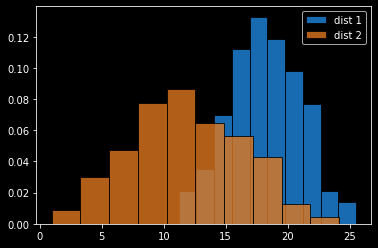

In [13]:
import numpy as np

dist_1 = np.genfromtxt("1.csv")
dist_2 = np.genfromtxt("2.csv")

plt.hist(dist_1, alpha=.8, density=True, label='dist 1', edgecolor='black', color='#1F85DE')
plt.hist(dist_2, alpha=.8, density=True, label='dist 2', edgecolor='black', color='#DE781F')
plt.legend()
plt.show()

1. Suppose that we want to run a two-sample t-test to compare the sample means for two groups (saved as `dist_1` and `dist_2` in the workspace).

    Before running the test, we want to check whether the ratio of standard deviations for these groups is equal. Use the NumPy `std()` function to divide the standard deviation of `dist_1` by the standard deviation of `dist_2` and save the result as `ratio`, then print it out.

    Are the standard deviations roughly equal?

*Hint: The ratio of standard deviations is approximately `0.62` — outside the range of 0.9-1.1, which we said would indicate equal standard deviations. Thus, the standard deviations do not appear to be equal.*

In [14]:
ratio = np.std(dist_1) / np.std(dist_2)
ratio

0.6240550627217001

2. Inspect the histograms of the distributions. Are they approximately normal? If so, set the value of `normal_assumption` equal to `True` in the cell below; otherwise set `normal_assumption` equal to `False`.

*Hint: Look for things like a multi-modal distribution (multiple 'humps'), highly skewed data, or outliers. As long as you do not see any of those things, you can assume that the normality assumption is met.*

In [15]:
normal_assumption = True

***

## Chi-Square Test

If we want to understand whether the outcomes of two categorical variables are associated, we can use a Chi-Square test. It is useful in situations like:

* An A/B test where half of users were shown a green submit button and the other half were shown a purple submit button. Was one group more likely to click the submit button?
* People under and over age 40 were given a survey asking “Which of the following three products is your favorite?” Did these age groups have significantly different preferences?

In `SciPy`, we can use the function `chi2_contingency()` to perform a Chi-Square test. The input to `chi2_contingency` is a contingency table, which can be created using the `pandas` `crosstab()` function as follows:

```
#create table:
import pandas as pd
table = pd.crosstab(variable_1, variable_2)
 
#run the test:
from scipy.stats import chi2_contingency
chi2, pval, dof, expected = chi2_contingency(table)
```
For example, suppose we want to know whether gender is associated with the probability of a website visitor making a purchase. The null hypothesis is that there is no association between the variables (eg. males, females, and non-binary people are all equally likely to make a purchase on the website, so gender and purchase-status are not associated). If the p-value is below our chosen threshold (often 0.05), we reject the null hypothesis and can conclude there is a statistically significant association between the two variables (eg. men, women, and non-binary people appear to have different probabilities of making a purchase, so gender is associated with purchase-status).

***
### Exercise

In [16]:
from scipy.stats import chi2_contingency

ants = pd.read_csv("ants_grade.csv")
ants.head()

,Grade,Ant
0,1st,harvester
1,2nd,harvester
2,2nd,leaf cutter
3,1st,harvester
4,3rd,leaf cutter


1. The management at the VeryAnts ant store wants to know if their two most popular species of ants, the Leaf Cutter and the Harvester, vary in popularity between 1st, 2nd, and 3rd graders.

    We have provided a dataset named `ants` with a sample of 108 sales to 1st, 2nd, and 3rd grade teachers. The dataset has two columns: `Grade` (equal to `'1st'`, `'2nd'`, or '`3rd'`) and Ant (equal to `'Leaf Cutter'` or `'Harvester'`).

    Use this data to create a contingency table of the `Grade` and `Ant` columns, and save the table as `table`.

In [17]:
table = pd.crosstab(ants['Ant'], ants['Grade'])
table

Grade,1st,2nd,3rd
Ant,,,
harvester,28,31,23
leaf cutter,8,5,13


2. Use the `chi2_contingency()` function from `SciPy` to run a Chi-Square test using the contingency table you just created (saved as `table`). Save the p-value as `pval` and print it out.

In [18]:
_, pval, _, _ = chi2_contingency(table)
pval

0.08356116834982273

3. Are certain types of ants more popular among specific grades (is there an association between grade and ant type)? Using a significance threshold of 0.05, indicate your answer by changing the value of `significant` to `True` if there is a significant association between these variables and `False` otherwise.

In [19]:
significant = pval < significance_threshold
significant

False

***

## Assumptions of a Chi-Square Test

Before we use a Chi-Square test, we need to be sure that the following things are true:

### 1. The observations should be independently randomly sampled from the population

This is also true of 2-sample t-tests, ANOVA, and Tukey. The purpose of this assumption is to ensure that the sample is representative of the population of interest.

### 2. The categories of both variables must be mutually exclusive

In other words, individual observations should only fall into one category per variable. This means that categorical variables like "college major", where students can have multiple different college majors, would not be appropriate for a Chi-Square test.

### 3. The groups should be independent

Similar to 2-sample t-tests, ANOVA, and Tukey, a Chi-Square test also should not be used if either of the categorical variables splits observations into groups that can influence one another. For example, a Chi-Square test would **not** be appropriate if one of the variables represents three different time points.

***
### Exercise

1. Researchers are running a study to test a new vaccine for Covid-19 in adults. A sample of 1000 adults (you can assume that they are randomly sampled adults, or at least representative of the population) are randomly split into two groups: half get a vaccine, while the other half get a placebo. Everyone is monitored for six months to see if they develop symptoms of Covid-19. The first few rows of the resulting dataset looks like this:

    |Group|Outcome|
    |:----|:------|
    |vaccine|not sick|
    |vaccine|not sick|
    |placebo|sick|
    |placebo|not sick|

    The researchers want to use this data to determine whether their vaccine will be effective at preventing illness in the general population of adults (eg., is whether or not someone got a vaccine associated with whether or not they got sick?).

    Is a Chi-Square test appropriate to address this question? Change the value of `checkpoint_1` to `True` if a Chi-Square test is appropriate and `False` if it is not.

*Hint: This research question addresses an association between two categorical variables. The sample is representative of the population, the categories are mutually exclusive (each person gets a placebo or vaccine but not both; each person gets sick or does not get sick), and the groups are independent.*

In [20]:
checkpoint_1 = True

2. Researchers are interested in studying the effect of a 10 minute yoga regimen on self-reported mood in adults. In order to test this, a representative sample of 1000 adults are asked to complete a survey where they rate their current happiness level as "very low", "low", "neutral", "high", or "very high". Each person then completes a 10 minute yoga regimen, then responds to the same survey once again. The first few rows of data from this study look like this:

    |Person ID|Time|Happiness|
    |:--------|:---|:--------|
    |1|before yoga|low|
    |1|after yoga|neutral|
    |2|before yoga|neutral|
    |2|after yoga|high|

The researchers want to know if 10 minutes of yoga can help improve self-reported mood for adults in the general population (eg., is whether or not someone has just completed 10 minutes of yoga associated with their self-reported happiness level?).

Is a Chi-Square test appropriate to address this question? Change the value of `checkpoint_2` to `True` if a Chi-Square test is appropriate and `False` if it is not.

*Hint: Note that one of the categorical variables has to do with time (before or after yoga). This variable splits observations into groups that are not independent: someone’s happiness level before yoga can clearly influence their happiness level after yoga.*

In [21]:
checkpoint_2 = False

***

## Review

In this lesson, we have reviewed a few different ways to run a hypothesis test for an association between two variables:

* Two Sample T-Tests (for an association between a quantitative variable and a binary categorical variable)
* ANOVA and Tukey Tests (for an association between a quantitative variable and a non-binary categorical variable)
* Chi-Square Tests (for an association between two categorical variables)

You are now equipped to use and interpret the results of each of these tests!

Take a look at the diagram provided for you in the workspace. The picture summarizes the four different hypothesis tests we have covered in this lesson and when to use them. Think of an association that you might be interested in exploring — in your own work or daily life! Can you identify which hypothesis test would be best suited to address your question?

<img src="https://static-assets.codecademy.com/Courses/Hypothesis-Testing/association_diagram.png" width="1000"></img>